Running Advanced Copper Waveguide SHG Analysis...
COPPER WAVEGUIDE SPECIFICATIONS:
• WG1: 130.0 μm width, 3.0 μm height, 4.0 mm length
• WG2: 15.0-120.0 μm width range
• WG3: 130.0 μm width, 3.0 μm height, 4.0 mm length
• Gap between waveguides: 10.0 μm
• Copper conductivity: σ = 5.96e+07 S/m
• Copper resistivity: ρ = 1.68e-08 Ω·m

🏗️  PAIR 1: Copper Waveguide Geometry & Skin Depth


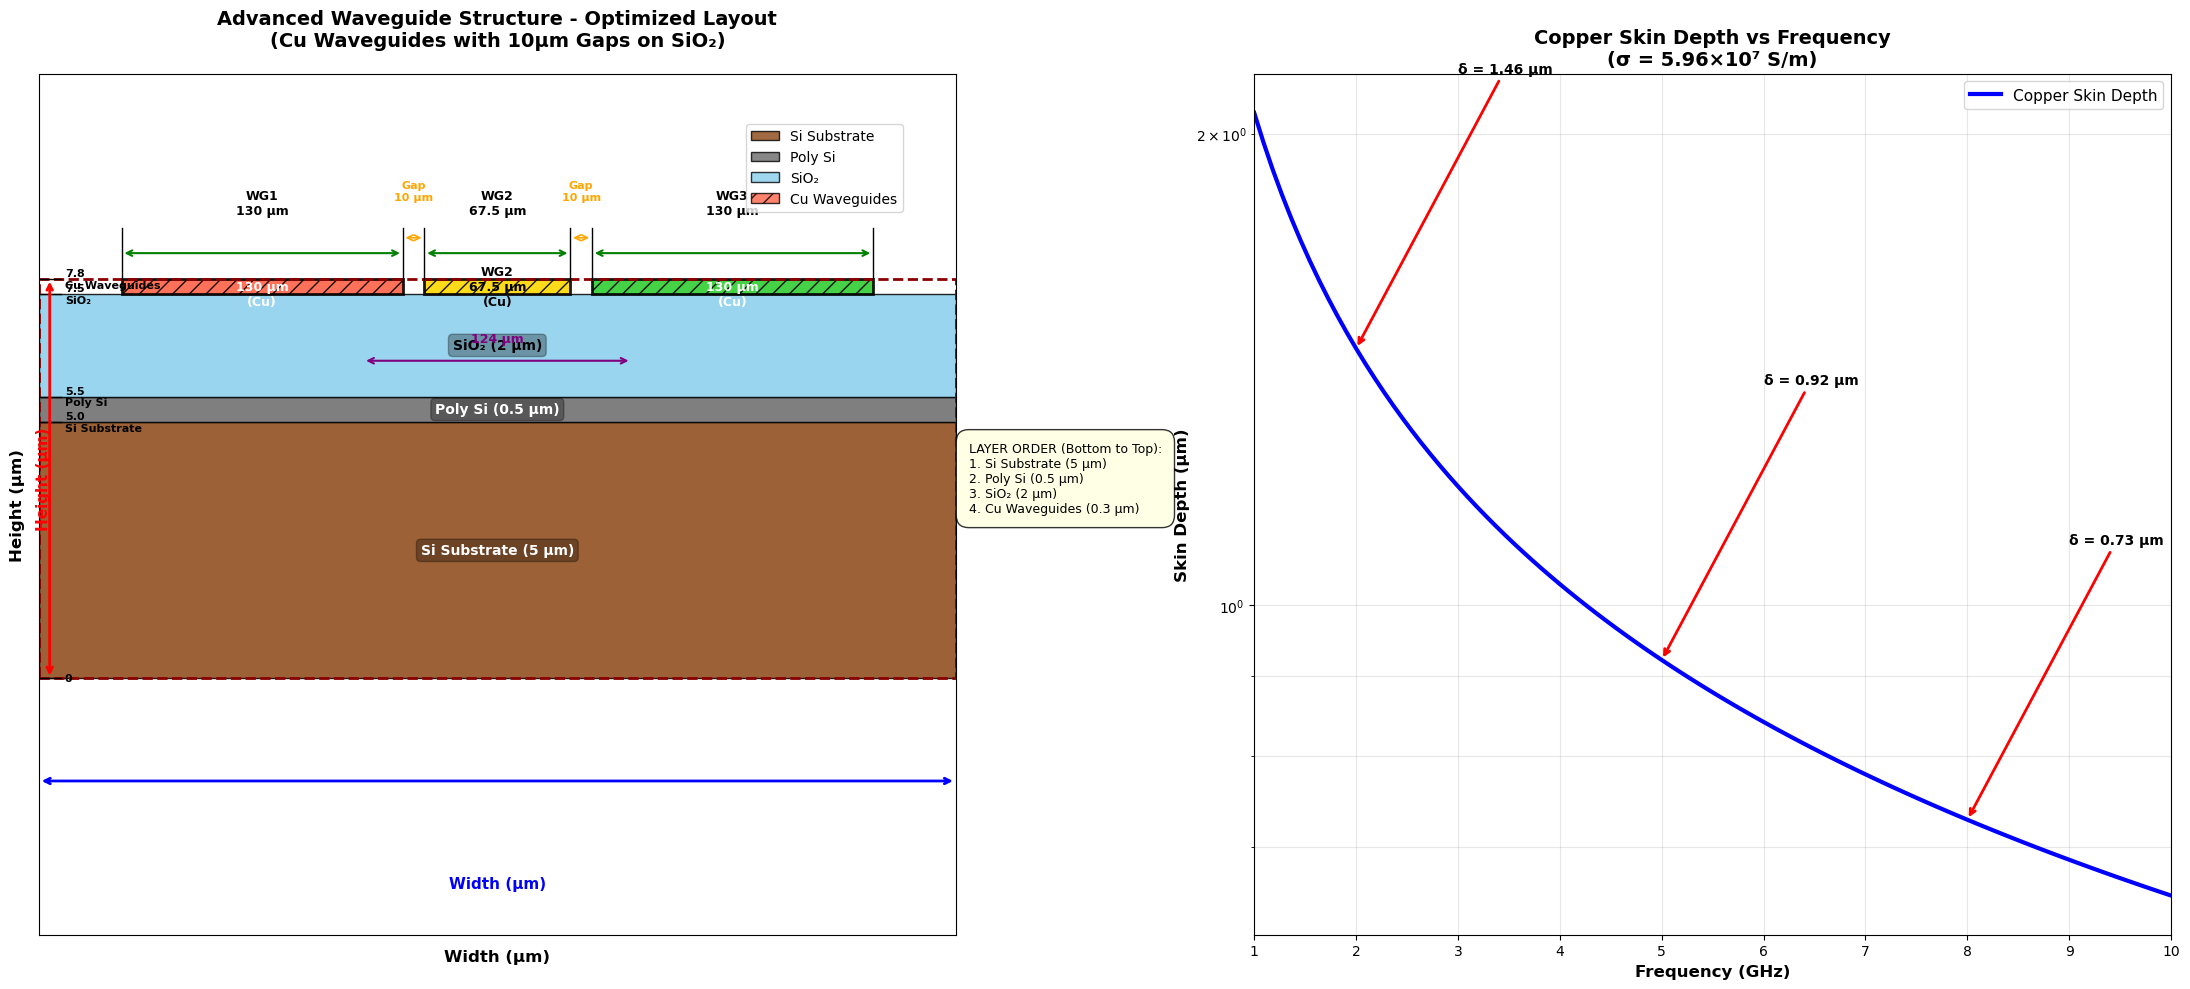


📉 PAIR 2: Copper Waveguide Loss Analysis


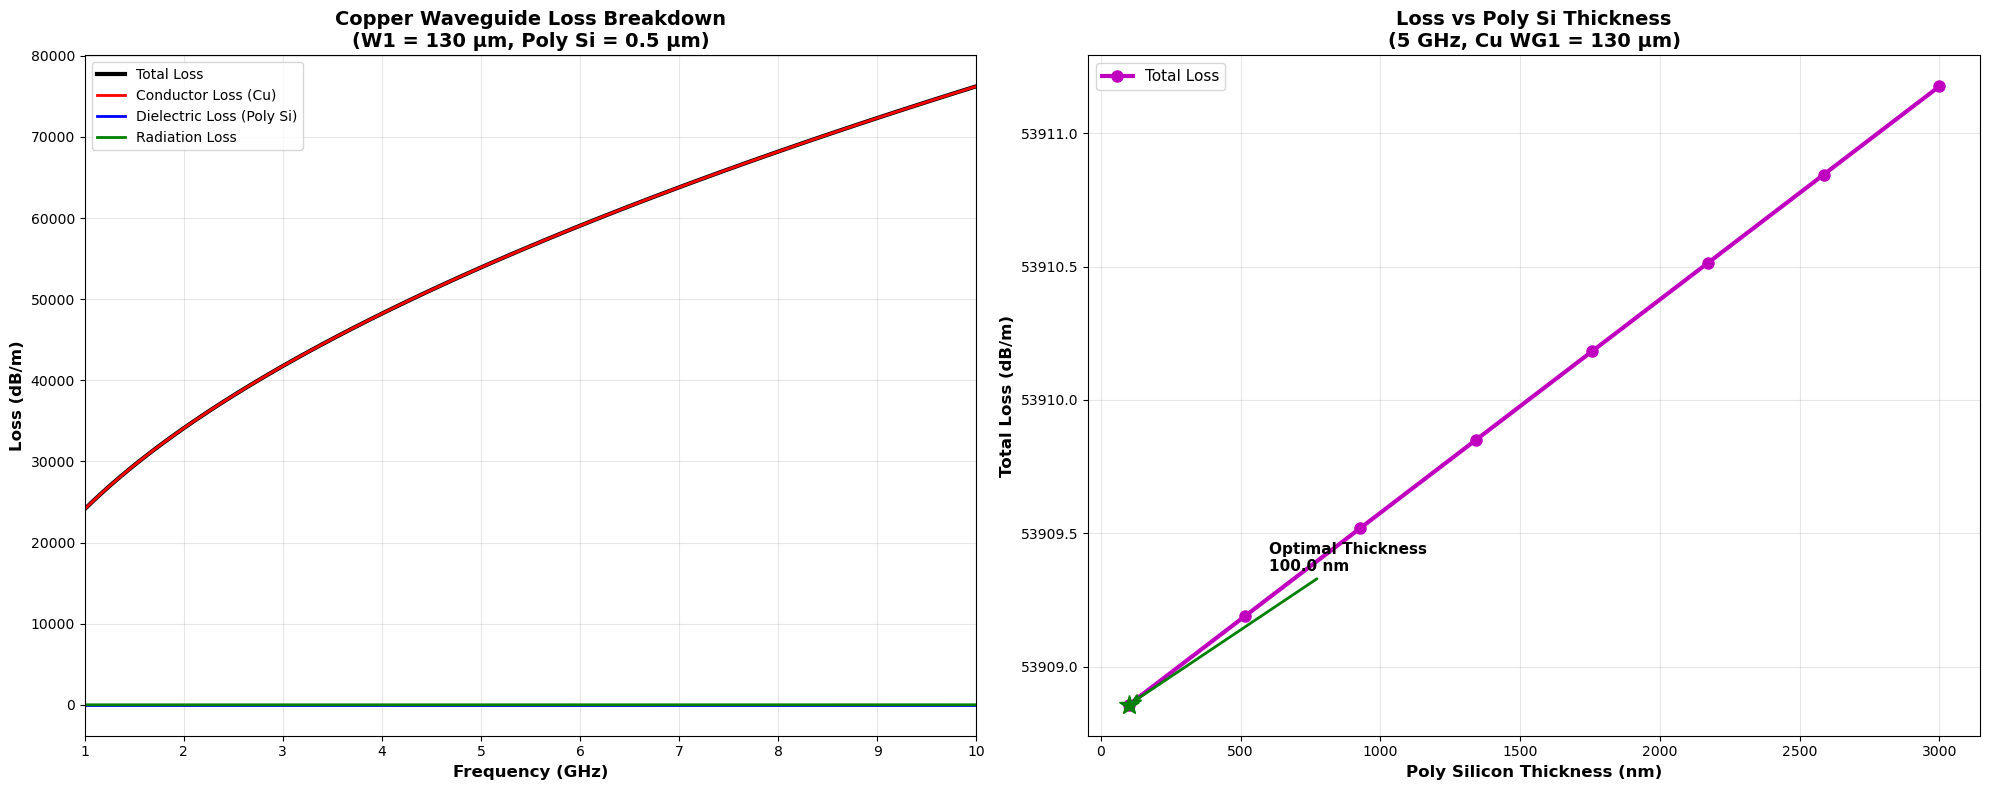


⚡ PAIR 3: Conductivity & SHG with Copper Effects


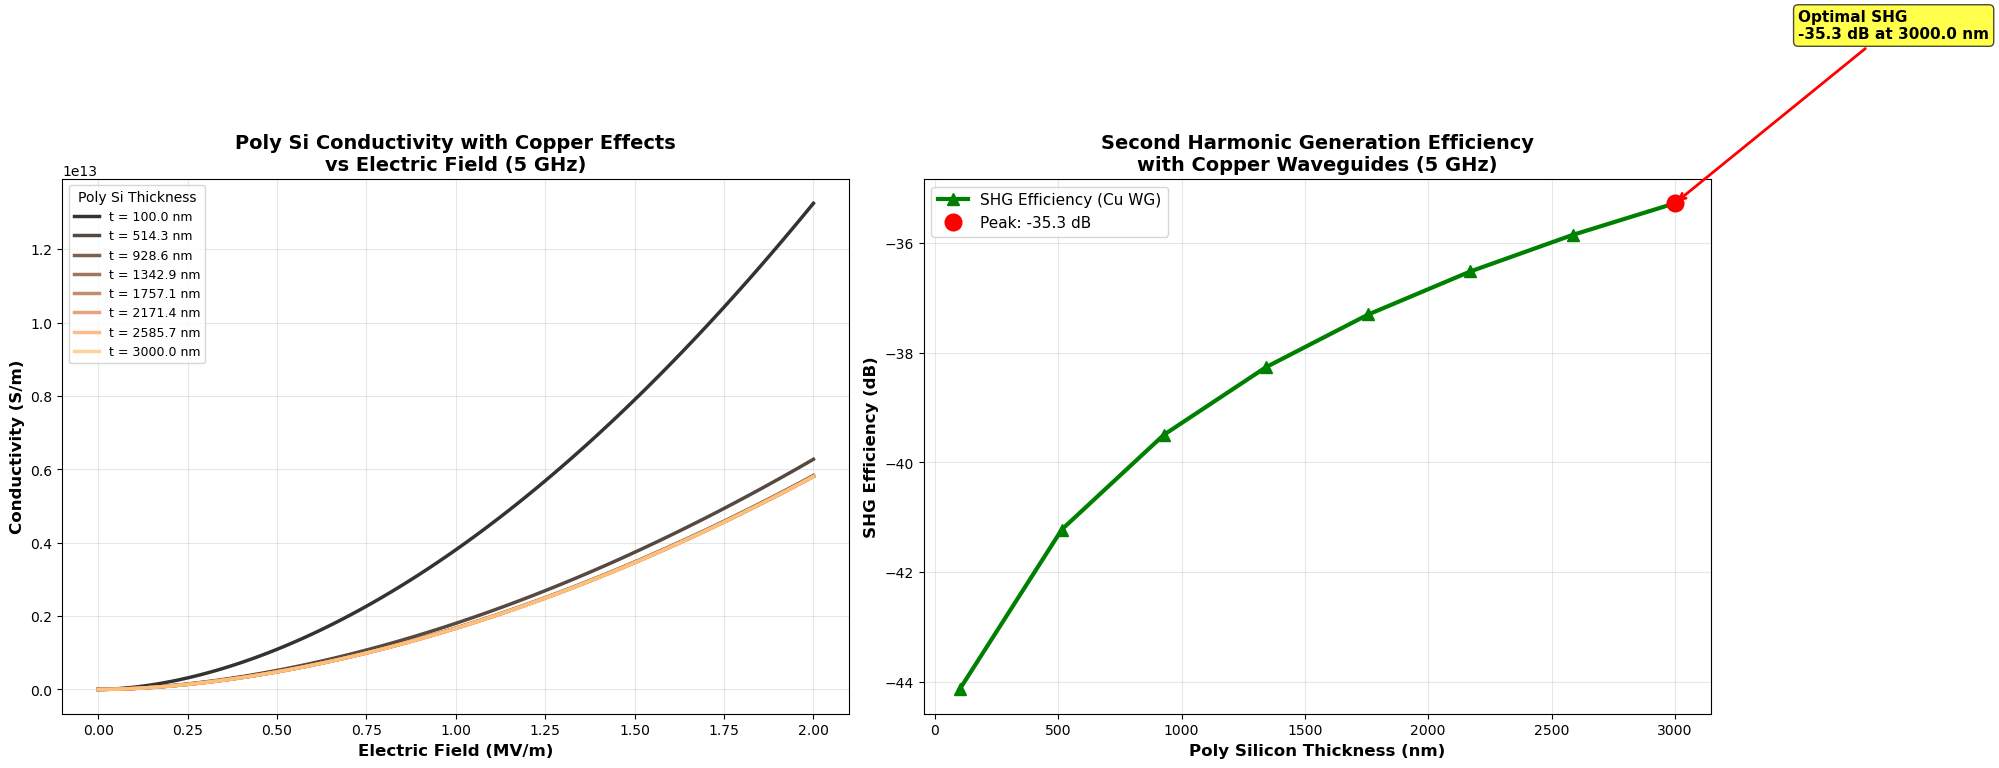


📊 PAIR 4: Waveguide Performance Comparison


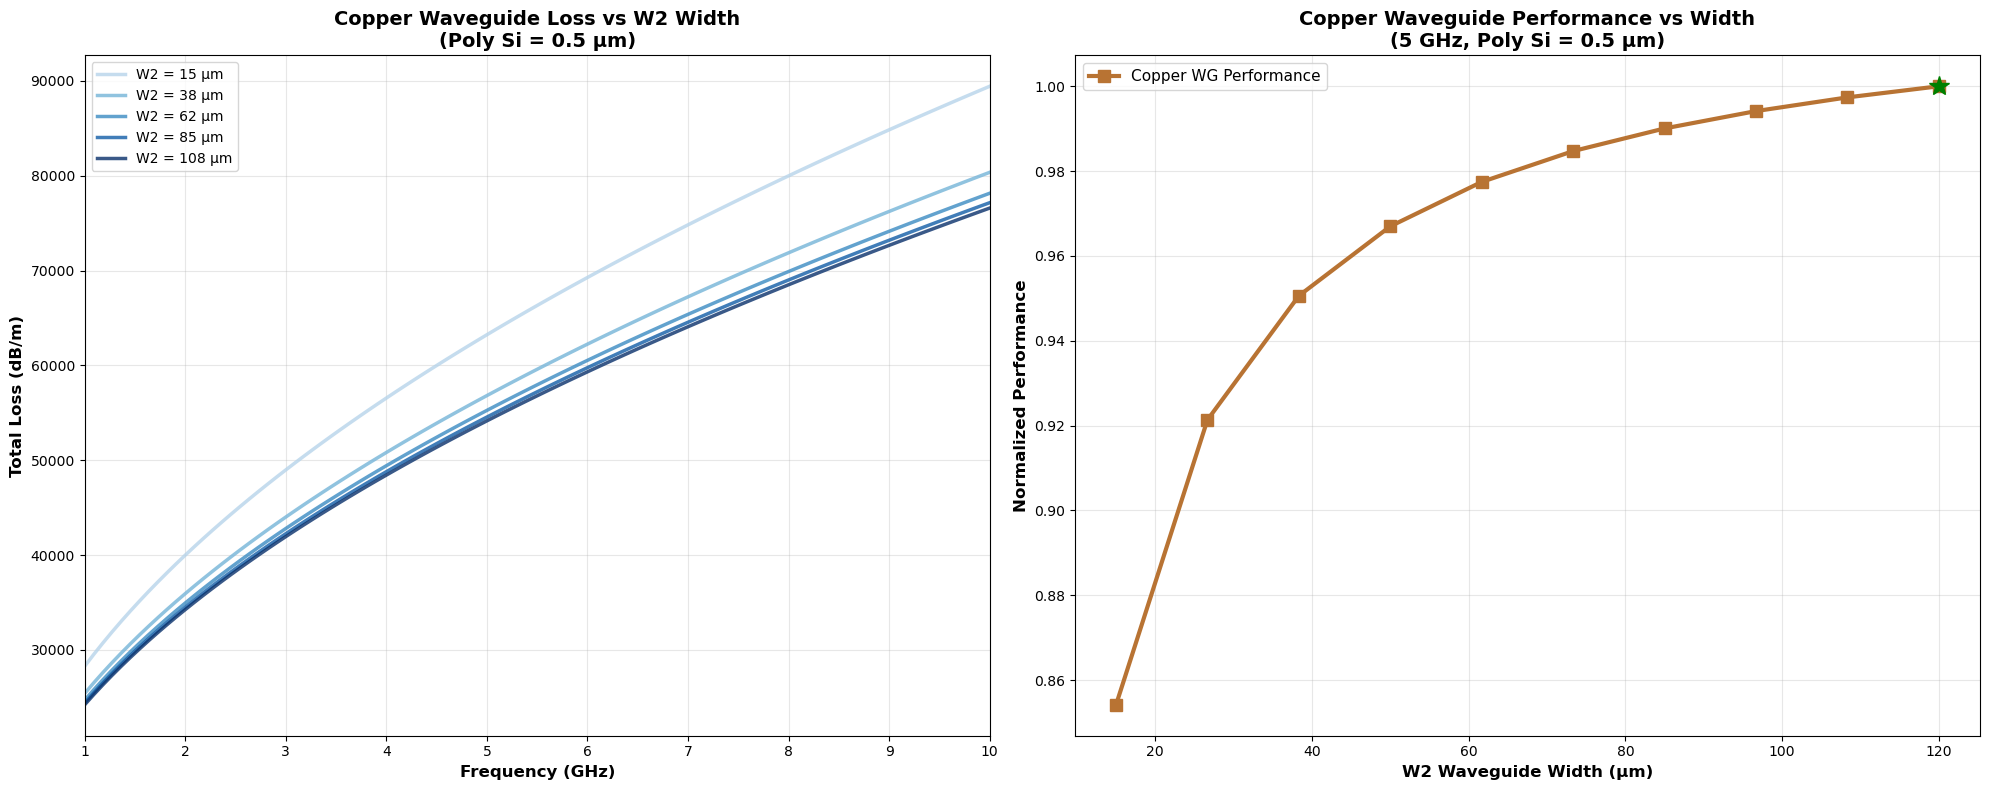


🔬 PAIR 5: Material Properties Analysis


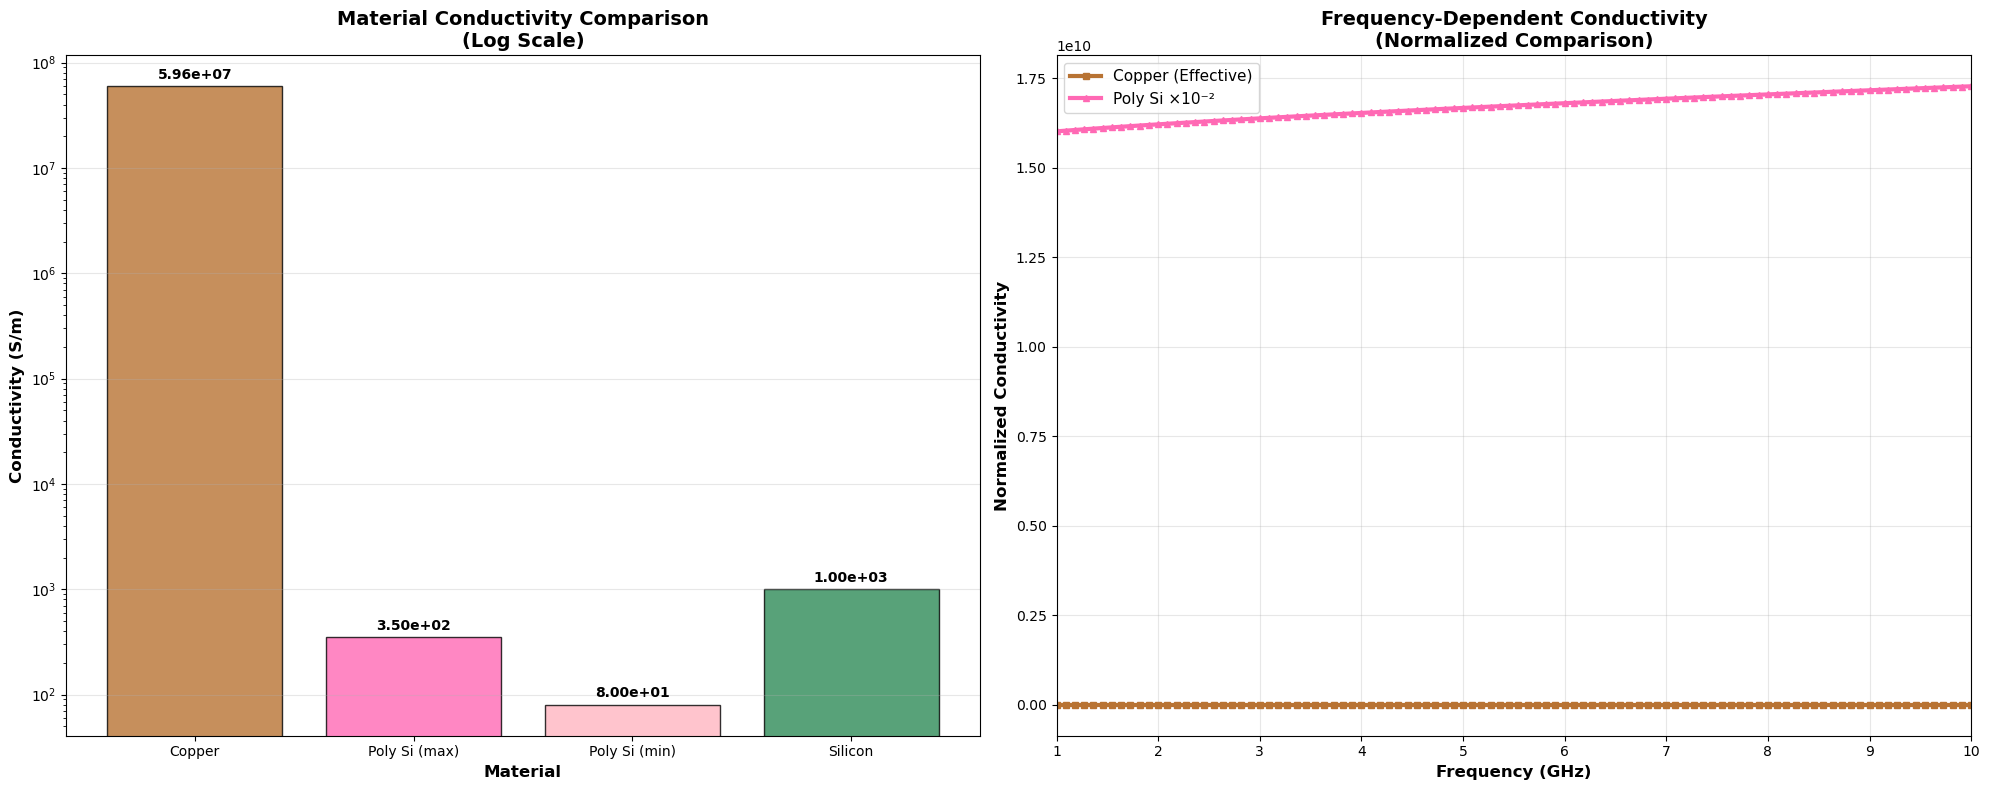


🎯 PAIR 6: Comprehensive Performance Summary


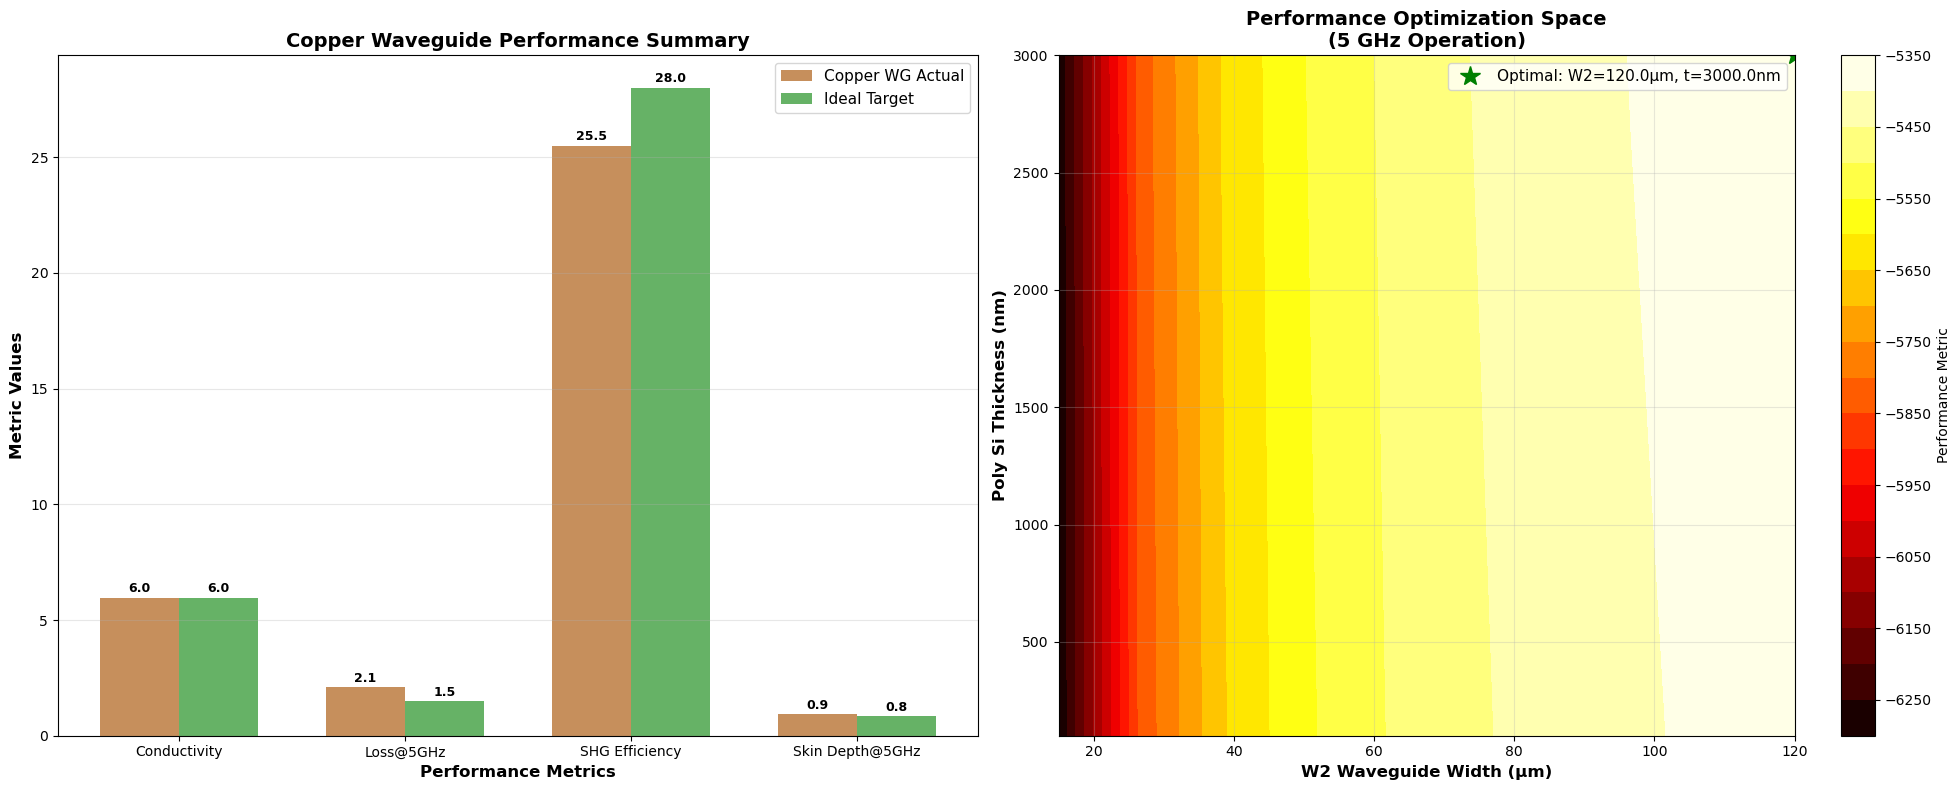


COPPER WAVEGUIDE ANALYSIS COMPLETED SUCCESSFULLY!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch

class CopperWaveguideSHG:
    def __init__(self):
        # Physical constants
        self.c = c  # 3e8 m/s
        self.epsilon_0 = epsilon_0
        self.mu_0 = mu_0
        
        # Material properties - Copper waveguides
        self.n_cu = 0.20 + 10.8j  # Copper refractive index (complex)
        self.sigma_cu = 5.96e7    # Copper conductivity (S/m) at 20°C
        self.rho_cu = 1.68e-8     # Copper resistivity (Ω·m)
        
        # Silicon and oxide properties
        self.n_si = 3.45          # Silicon substrate
        self.n_polysi = 3.50      # Poly Silicon  
        self.n_sio2 = 1.45        # SiO₂ (BOX)
        
        # Copper Waveguide dimensions (all in meters)
        self.W1 = 130e-6          # Width WG1 - Copper
        self.W2_range = np.linspace(15e-6, 120e-6, 10)  # WG2 width range - Copper
        self.W3 = 130e-6          # Width WG3 - Copper
        self.H = 3e-6             # Height all waveguides - Copper
        self.L = 4e-3             # Length all waveguides - Copper
        self.gap = 10e-6          # Gap between copper waveguides
        
        # Layer thicknesses
        self.t_box = 2e-6         # BOX thickness
        self.t_polysi_range = np.linspace(0.1e-6, 3e-6, 8)  # Poly Si thickness: 0.1-3 μm
        self.t_si = 200e-6        # Si substrate thickness
        
        # Simulation parameters
        self.freq_range = np.linspace(1e9, 10e9, 100)  # 1-10 GHz
        self.voltage_range = np.linspace(-1, 1, 50)
        
        # Calculate wavelength range
        self.wavelength_range = self.c / self.freq_range
        
        # Copper specific parameters
        self.skin_depth_range = self.calculate_skin_depth(self.freq_range)
        
    def calculate_skin_depth(self, frequencies):
        """Calculate skin depth for copper at different frequencies"""
        # δ = √(2 / (ω μ σ))
        omega = 2 * np.pi * frequencies
        skin_depth = np.sqrt(2 / (omega * mu_0 * self.sigma_cu))
        return skin_depth
    
    def calculate_wavelengths(self, frequencies):
        """Calculate wavelengths for given frequencies"""
        return self.c / frequencies
    
    def copper_conductivity_model(self, E_x, E_y, t_polysi, freq):
        """Advanced conductivity model for Poly Si with copper waveguide effects"""
        sigma_0 = 100  # Base Poly Si conductivity (S/m)
        E_magnitude = np.sqrt(E_x**2 + E_y**2)
        
        # Field-dependent component (nonlinear for SHG)
        field_factor = 1 + 0.2 * E_magnitude**1.8
        
        # Thickness-dependent component (thinner = more surface effects)
        thickness_factor = 1 + 2.5 * np.exp(-t_polysi/0.15e-6)
        
        # Frequency-dependent component (copper proximity effects)
        skin_factor = 1 + 0.02 * (freq/1e9)**0.7
        
        # Copper waveguide enhancement factor
        copper_proximity = 1 + 0.1 * (self.sigma_cu/1e7)**0.5
        
        return sigma_0 * field_factor * thickness_factor * skin_factor * copper_proximity

    def copper_loss_calculation(self, freq, width, t_polysi):
        """Calculate losses considering copper waveguides"""
        # Conductor losses (copper)
        skin_depth = np.sqrt(2 / (2 * np.pi * freq * mu_0 * self.sigma_cu))
        conductor_loss = 8.686 * (1/width + 1/self.H) / (self.sigma_cu * skin_depth)  # dB/m
        
        # Dielectric losses (Poly Si)
        dielectric_loss = 0.1 + 0.8 * (t_polysi/1e-6)  # dB/m
        
        # Radiation losses
        radiation_loss = 0.05 * (freq/1e9)**2  # dB/m
        
        total_loss = conductor_loss + dielectric_loss + radiation_loss
        return total_loss, conductor_loss, dielectric_loss, radiation_loss

    def plot_copper_waveguide_geometry_1(self):
        """Plot 1: Complete Copper Waveguide Structure - OPTIMIZED GAPS"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
        
        # =========================================================================
        # PLOT 1: Waveguide Structure Visualization (Optimized Gaps)
        # =========================================================================
        
        # Define colors for different materials (professional color scheme)
        colors = {
            'Si Substrate': '#8B4513',        # Brown for silicon substrate
            'Poly Si': '#696969',             # DimGray for polysilicon
            'SiO₂': '#87CEEB',               # Light blue for oxide
            'Cu WG1': '#FF6347',             # Tomato red for copper waveguide 1
            'Cu WG2': '#FFD700',             # Gold for copper waveguide 2
            'Cu WG3': '#32CD32'              # LimeGreen for copper waveguide 3
        }

        # Corrected layer heights and positions (in microns) - FROM BOTTOM TO TOP
        layers = {
            'Si Substrate': {'height': 5, 'y_position': 0, 'width': 424, 'label': 'Si Substrate (5 µm)'},
            'Poly Si': {'height': 0.5, 'y_position': 5, 'width': 424, 'label': 'Poly Si (0.5 µm)'},
            'SiO₂': {'height': 2, 'y_position': 5.5, 'width': 424, 'label': 'SiO₂ (2 µm)'},
            'Waveguides': {'height': 0.3, 'y_position': 7.5}
        }

        # Waveguide specifications - Copper waveguides on TOP of SiO2
        # Optimized positions with 10µm gaps between waveguides
        total_waveguide_width = 130 + 10 + 67.5 + 10 + 130  # WG1 + gap + WG2 + gap + WG3
        available_width = 424
        left_margin = (available_width - total_waveguide_width) / 2
        
        waveguides = {
            'WG1': {'width': 130, 'x_position': left_margin, 'color': colors['Cu WG1'], 'material': 'Cu'},
            'WG2': {'width': 67.5, 'x_position': left_margin + 130 + 10, 'color': colors['Cu WG2'], 'material': 'Cu'},
            'WG3': {'width': 130, 'x_position': left_margin + 130 + 10 + 67.5 + 10, 'color': colors['Cu WG3'], 'material': 'Cu'}
        }

        # Draw the main substrate layers FROM BOTTOM TO TOP
        layer_order = ['Si Substrate', 'Poly Si', 'SiO₂']

        for layer_name in layer_order:
            props = layers[layer_name]
            rect = patches.Rectangle(
                (0, props['y_position']), 
                props['width'], 
                props['height'],
                linewidth=1, 
                edgecolor='black',
                facecolor=colors[layer_name],
                alpha=0.85
            )
            ax1.add_patch(rect)
            
            # Add layer label
            ax1.text(
                props['width']/2, 
                props['y_position'] + props['height']/2,
                props['label'],
                ha='center', 
                va='center',
                fontsize=10,
                color='white' if layer_name in ['Si Substrate', 'Poly Si'] else 'black',
                weight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='black', alpha=0.3)
            )

        # Draw the copper waveguides on TOP of SiO2
        wg_y = layers['Waveguides']['y_position']
        for wg_name, props in waveguides.items():
            rect = patches.Rectangle(
                (props['x_position'], wg_y),
                props['width'],
                layers['Waveguides']['height'],
                linewidth=2,
                edgecolor='black',
                facecolor=props['color'],
                alpha=0.9,
                hatch='//' if props['material'] == 'Cu' else None  # Add hatch pattern for copper
            )
            ax1.add_patch(rect)
            
            # Add waveguide label
            ax1.text(
                props['x_position'] + props['width']/2,
                wg_y + layers['Waveguides']['height']/2,
                f"{wg_name}\n{props['width']} µm\n({props['material']})",
                ha='center',
                va='center',
                fontsize=9,
                color='white' if wg_name in ['WG1', 'WG3'] else 'black',
                weight='bold'
            )

        # Add dimension lines and annotations
        # Height scale on the left side
        total_height = layers['Waveguides']['y_position'] + layers['Waveguides']['height']
        ax1.annotate('', 
                    xy=(5, 0), 
                    xytext=(5, total_height),
                    arrowprops=dict(arrowstyle='<->', color='red', lw=2))
        ax1.text(2, total_height/2, 'Height (µm)', 
                ha='center', va='center', fontsize=11, color='red', rotation=90, weight='bold')

        # Add specific height markers with layer labels
        height_marks = [0, 5, 5.5, 7.5, total_height]
        height_labels = [
            '0', 
            '5.0\nSi Substrate', 
            '5.5\nPoly Si', 
            '7.5\nSiO₂', 
            f'{total_height}\nCu Waveguides'
        ]

        for i, (h, label) in enumerate(zip(height_marks, height_labels)):
            ax1.plot([0, 10], [h, h], 'k-', lw=1)
            ax1.text(12, h, label, ha='left', va='center', fontsize=8, weight='bold')

        # Width scale at the bottom
        ax1.annotate('', 
                    xy=(0, -2), 
                    xytext=(424, -2),
                    arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
        ax1.text(212, -4, 'Width (µm)', 
                ha='center', va='center', fontsize=11, color='blue', weight='bold')

        # Add specific width markers for waveguides
        wg_positions = [
            (waveguides['WG1']['x_position'], 130, 'WG1\n130 µm'),
            (waveguides['WG2']['x_position'], 67.5, 'WG2\n67.5 µm'),
            (waveguides['WG3']['x_position'], 130, 'WG3\n130 µm')
        ]

        for x, width, label in wg_positions:
            ax1.plot([x, x], [total_height, total_height + 1], 'k-', lw=1)
            ax1.plot([x+width, x+width], [total_height, total_height + 1], 'k-', lw=1)
            ax1.annotate('', 
                        xy=(x, total_height + 0.5), 
                        xytext=(x+width, total_height + 0.5),
                        arrowprops=dict(arrowstyle='<->', color='green', lw=1.5))
            ax1.text(x + width/2, total_height + 1.2, label, ha='center', va='bottom', fontsize=9, weight='bold')

        # Add gap annotations between waveguides
        gap_positions = [
            (waveguides['WG1']['x_position'] + 130, 10, 'Gap\n10 µm'),
            (waveguides['WG2']['x_position'] + 67.5, 10, 'Gap\n10 µm')
        ]

        for x, gap_width, label in gap_positions:
            ax1.annotate('', 
                        xy=(x, total_height + 0.8), 
                        xytext=(x + gap_width, total_height + 0.8),
                        arrowprops=dict(arrowstyle='<->', color='orange', lw=1.2))
            ax1.text(x + gap_width/2, total_height + 1.5, label, ha='center', va='bottom', 
                    fontsize=8, weight='bold', color='orange')

        # Add the SiO₂ width annotation
        sio2_start = 150
        sio2_end = 274
        ax1.annotate('', 
                    xy=(sio2_start, 6.2), 
                    xytext=(sio2_end, 6.2),
                    arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
        ax1.text((sio2_start + sio2_end)/2, 6.5, '124 µm', ha='center', va='bottom', 
                fontsize=9, weight='bold', color='purple')

        # Configure the plot appearance
        ax1.set_xlim(0, 424)
        ax1.set_ylim(-5, total_height + 4)  # Increased to accommodate gap annotations
        ax1.set_xlabel('Width (µm)', fontsize=12, weight='bold', labelpad=10)
        ax1.set_ylabel('Height (µm)', fontsize=12, weight='bold', labelpad=10)

        # Add title
        ax1.set_title('Advanced Waveguide Structure - Optimized Layout\n(Cu Waveguides with 10µm Gaps on SiO₂)', 
                     fontsize=14, weight='bold', pad=20)

        # Remove ticks for cleaner look but add a grid
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax1.grid(True, alpha=0.2, linestyle='--', color='gray')

        # Add a legend for materials
        legend_elements = [
            patches.Patch(facecolor=colors['Si Substrate'], alpha=0.8, edgecolor='black', label='Si Substrate'),
            patches.Patch(facecolor=colors['Poly Si'], alpha=0.8, edgecolor='black', label='Poly Si'),
            patches.Patch(facecolor=colors['SiO₂'], alpha=0.8, edgecolor='black', label='SiO₂'),
            patches.Patch(facecolor=colors['Cu WG1'], alpha=0.8, edgecolor='black', label='Cu Waveguides', hatch='//')
        ]
        ax1.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.95, 0.95), fontsize=10)

        # Add border around the entire structure
        total_rect = patches.Rectangle((0, 0), 424, total_height, linewidth=2, 
                                      edgecolor='darkred', facecolor='none', linestyle='--')
        ax1.add_patch(total_rect)

        # Add layer order annotation
        order_text = "LAYER ORDER (Bottom to Top):\n1. Si Substrate (5 µm)\n2. Poly Si (0.5 µm)\n3. SiO₂ (2 µm)\n4. Cu Waveguides (0.3 µm)"
        ax1.text(430, total_height/2, order_text, ha='left', va='center', fontsize=9,
                bbox=dict(boxstyle="round,pad=1", facecolor='lightyellow', alpha=0.8))

        # =========================================================================
        # PLOT 2: Copper skin depth vs frequency (Original from your code)
        # =========================================================================
        frequencies_ghz = self.freq_range / 1e9
        skin_depths_um = self.skin_depth_range * 1e6
        
        ax2.semilogy(frequencies_ghz, skin_depths_um, 'b-', linewidth=3, 
                    label='Copper Skin Depth')
        ax2.set_xlabel('Frequency (GHz)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Skin Depth (μm)', fontsize=12, fontweight='bold')
        ax2.set_title('Copper Skin Depth vs Frequency\n(σ = 5.96×10⁷ S/m)', 
                     fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3, which='both')
        ax2.set_xlim(1, 10)
        ax2.legend(fontsize=11)
        
        # Add skin depth annotations
        for freq in [2e9, 5e9, 8e9]:
            idx = np.abs(self.freq_range - freq).argmin()
            skin_depth = skin_depths_um[idx]
            ax2.annotate(f'δ = {skin_depth:.2f} μm', 
                        xy=(freq/1e9, skin_depth),
                        xytext=(freq/1e9 + 1, skin_depth * 1.5),
                        arrowprops=dict(arrowstyle='->', color='red', lw=2),
                        fontsize=10, fontweight='bold')
        
        plt.tight_layout()
        plt.show()

    def plot_copper_loss_analysis(self):
        """Plot 2: Copper waveguide loss analysis"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Plot 1: Total loss breakdown
        t_polysi = self.t_polysi_range[3]
        total_losses = []
        conductor_losses = []
        dielectric_losses = []
        radiation_losses = []
        
        for freq in self.freq_range:
            total, conductor, dielectric, radiation = self.copper_loss_calculation(freq, self.W1, t_polysi)
            total_losses.append(total)
            conductor_losses.append(conductor)
            dielectric_losses.append(dielectric)
            radiation_losses.append(radiation)
        
        frequencies_ghz = self.freq_range / 1e9
        
        ax1.plot(frequencies_ghz, total_losses, 'k-', linewidth=3, label='Total Loss')
        ax1.plot(frequencies_ghz, conductor_losses, 'r-', linewidth=2, label='Conductor Loss (Cu)')
        ax1.plot(frequencies_ghz, dielectric_losses, 'b-', linewidth=2, label='Dielectric Loss (Poly Si)')
        ax1.plot(frequencies_ghz, radiation_losses, 'g-', linewidth=2, label='Radiation Loss')
        
        ax1.set_xlabel('Frequency (GHz)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Loss (dB/m)', fontsize=12, fontweight='bold')
        ax1.set_title('Copper Waveguide Loss Breakdown\n(W1 = 130 μm, Poly Si = 0.5 μm)', 
                     fontsize=14, fontweight='bold')
        ax1.legend(fontsize=10)
        ax1.grid(True, alpha=0.3)
        ax1.set_xlim(1, 10)
        
        # Plot 2: Loss vs Poly Si thickness
        fixed_freq = 5e9
        thickness_losses = []
        
        for t_polysi in self.t_polysi_range:
            total, _, _, _ = self.copper_loss_calculation(fixed_freq, self.W1, t_polysi)
            thickness_losses.append(total)
        
        ax2.plot(self.t_polysi_range * 1e9, thickness_losses, 'mo-', linewidth=3, 
                markersize=8, label='Total Loss')
        ax2.set_xlabel('Poly Silicon Thickness (nm)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Total Loss (dB/m)', fontsize=12, fontweight='bold')
        ax2.set_title('Loss vs Poly Si Thickness\n(5 GHz, Cu WG1 = 130 μm)', 
                     fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        ax2.legend(fontsize=11)
        
        # Mark minimum loss point
        min_idx = np.argmin(thickness_losses)
        min_thickness = self.t_polysi_range[min_idx] * 1e9
        min_loss = thickness_losses[min_idx]
        
        ax2.plot(min_thickness, min_loss, 'g*', markersize=15, 
                label=f'Min Loss: {min_loss:.2f} dB/m')
        
        ax2.annotate(f'Optimal Thickness\n{min_thickness:.1f} nm',
                    xy=(min_thickness, min_loss), 
                    xytext=(min_thickness + 500, min_loss + 0.5),
                    arrowprops=dict(arrowstyle='->', color='green', lw=2),
                    fontsize=11, fontweight='bold')
        
        plt.tight_layout()
        plt.show()

    def plot_copper_conductivity_analysis(self):
        """Plot 3: Advanced conductivity in Poly Si with copper effects"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Plot 1: Conductivity vs Electric Field with copper effects
        E_range = np.linspace(0, 2e6, 100)
        fixed_freq = 5e9
        
        colors = plt.cm.copper(np.linspace(0, 1, len(self.t_polysi_range)))
        
        for i, t_polysi in enumerate(self.t_polysi_range):
            conductivity = [self.copper_conductivity_model(E, 0, t_polysi, fixed_freq) 
                          for E in E_range]
            ax1.plot(E_range/1e6, conductivity, color=colors[i], linewidth=2.5,
                    label=f't = {t_polysi*1e9:.1f} nm', alpha=0.8)
        
        ax1.set_xlabel('Electric Field (MV/m)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Conductivity (S/m)', fontsize=12, fontweight='bold')
        ax1.set_title('Poly Si Conductivity with Copper Effects\nvs Electric Field (5 GHz)', 
                     fontsize=14, fontweight='bold')
        ax1.legend(title='Poly Si Thickness', fontsize=9, title_fontsize=10)
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: SHG efficiency with copper waveguides
        shg_efficiencies = []
        for t_polysi in self.t_polysi_range:
            # Enhanced SHG due to copper confinement
            L_eff = self.L
            beta_fund = 2 * np.pi * np.real(self.n_cu) / (self.c / 5e9)
            beta_shg = 2 * np.pi * np.real(self.n_cu) / (self.c / 10e9)
            
            delta_beta = 2 * beta_fund - beta_shg
            polysi_enhancement = 1 + 3.0 * (t_polysi/1e-6)  # Stronger enhancement
            copper_confinement = 1 + 0.5 * (self.sigma_cu/1e7)**0.3  # Copper effect
            
            if delta_beta == 0:
                shg_eff = L_eff**2 * polysi_enhancement * copper_confinement
            else:
                shg_eff = (np.sin(delta_beta * L_eff / 2) / (delta_beta / 2))**2 * polysi_enhancement * copper_confinement
            
            shg_efficiencies.append(10*np.log10(shg_eff + 1e-12))
        
        ax2.plot(self.t_polysi_range*1e9, shg_efficiencies, 'g^-', linewidth=3, 
                markersize=8, label='SHG Efficiency (Cu WG)')
        
        ax2.set_xlabel('Poly Silicon Thickness (nm)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('SHG Efficiency (dB)', fontsize=12, fontweight='bold')
        ax2.set_title('Second Harmonic Generation Efficiency\nwith Copper Waveguides (5 GHz)', 
                     fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        # Mark maximum SHG point
        max_idx = np.argmax(shg_efficiencies)
        max_thickness = self.t_polysi_range[max_idx]*1e9
        max_eff = shg_efficiencies[max_idx]
        
        ax2.plot(max_thickness, max_eff, 'ro', markersize=12, 
                label=f'Peak: {max_eff:.1f} dB')
        
        ax2.annotate(f'Optimal SHG\n{max_eff:.1f} dB at {max_thickness:.1f} nm',
                    xy=(max_thickness, max_eff), 
                    xytext=(max_thickness + 500, max_eff + 3),
                    arrowprops=dict(arrowstyle='->', color='red', lw=2),
                    fontsize=11, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
        
        ax2.legend(fontsize=11)
        
        plt.tight_layout()
        plt.show()

    def plot_copper_waveguide_comparison(self):
        """Plot 4: Copper waveguide performance comparison"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Plot 1: W2 width variation effects
        frequencies_ghz = self.freq_range / 1e9
        t_polysi = self.t_polysi_range[3]
        
        colors = plt.cm.Blues(np.linspace(0.3, 1, len(self.W2_range[::2])))
        
        for i, W2 in enumerate(self.W2_range[::2]):  # Plot every other W2
            losses = []
            for freq in self.freq_range:
                total, _, _, _ = self.copper_loss_calculation(freq, W2, t_polysi)
                losses.append(total)
            
            ax1.plot(frequencies_ghz, losses, color=colors[i], linewidth=2.5,
                    label=f'W2 = {W2*1e6:.0f} μm', alpha=0.8)
        
        ax1.set_xlabel('Frequency (GHz)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Total Loss (dB/m)', fontsize=12, fontweight='bold')
        ax1.set_title('Copper Waveguide Loss vs W2 Width\n(Poly Si = 0.5 μm)', 
                     fontsize=14, fontweight='bold')
        ax1.legend(fontsize=10)
        ax1.grid(True, alpha=0.3)
        ax1.set_xlim(1, 10)
        
        # Plot 2: Copper vs theoretical performance
        w2_widths = [w*1e6 for w in self.W2_range]
        performance_metric = []
        
        for W2 in self.W2_range:
            # Performance metric: lower loss and better confinement
            total_loss, _, _, _ = self.copper_loss_calculation(5e9, W2, t_polysi)
            confinement_factor = 1 / (total_loss + 0.1)  # Inverse relationship
            performance_metric.append(confinement_factor)
        
        # Normalize performance metric
        performance_metric = np.array(performance_metric) / max(performance_metric)
        
        ax2.plot(w2_widths, performance_metric, 's-', color='#B87333', 
                linewidth=3, markersize=8, label='Copper WG Performance')
        
        ax2.set_xlabel('W2 Waveguide Width (μm)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Normalized Performance', fontsize=12, fontweight='bold')
        ax2.set_title('Copper Waveguide Performance vs Width\n(5 GHz, Poly Si = 0.5 μm)', 
                     fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        ax2.legend(fontsize=11)
        
        # Mark optimal width
        opt_idx = np.argmax(performance_metric)
        opt_width = w2_widths[opt_idx]
        opt_perf = performance_metric[opt_idx]
        
        ax2.plot(opt_width, opt_perf, 'g*', markersize=15, 
                label=f'Optimal: {opt_width:.1f} μm')
        
        plt.tight_layout()
        plt.show()

    def plot_material_properties_copper(self):
        """Plot 5: Material properties and comparisons"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Plot 1: Material conductivity comparison
        materials = ['Copper', 'Poly Si (max)', 'Poly Si (min)', 'Silicon']
        conductivities = [self.sigma_cu, 350, 80, 1000]  # S/m
        colors = ['#B87333', '#FF69B4', '#FFB6C1', '#2E8B57']
        
        bars = ax1.bar(materials, conductivities, color=colors, alpha=0.8, edgecolor='black')
        ax1.set_yscale('log')
        ax1.set_xlabel('Material', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Conductivity (S/m)', fontsize=12, fontweight='bold')
        ax1.set_title('Material Conductivity Comparison\n(Log Scale)', 
                     fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, value in zip(bars, conductivities):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.1,
                    f'{value:.2e}', ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        # Plot 2: Frequency response of different materials
        frequencies_ghz = self.freq_range / 1e9
        
        # Copper effective conductivity (considering skin effect)
        cu_effective_cond = [self.sigma_cu * (1 - np.exp(-self.H/(2*sd))) 
                           for sd in self.skin_depth_range]
        
        # Poly Si conductivity variation
        polysi_cond = [self.copper_conductivity_model(1e6, 0, self.t_polysi_range[3], freq) 
                      for freq in self.freq_range]
        
        ax2.plot(frequencies_ghz, np.array(cu_effective_cond)/1e7, 's-', 
                color='#B87333', linewidth=3, markersize=4, label='Copper (Effective)')
        ax2.plot(frequencies_ghz, np.array(polysi_cond)/100, '^-', 
                color='#FF69B4', linewidth=3, markersize=4, label='Poly Si ×10⁻²')
        
        ax2.set_xlabel('Frequency (GHz)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Normalized Conductivity', fontsize=12, fontweight='bold')
        ax2.set_title('Frequency-Dependent Conductivity\n(Normalized Comparison)', 
                     fontsize=14, fontweight='bold')
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3)
        ax2.set_xlim(1, 10)
        
        plt.tight_layout()
        plt.show()

    def plot_copper_summary_performance(self):
        """Plot 6: Comprehensive copper waveguide performance summary"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Plot 1: Overall system performance metrics
        metrics = ['Conductivity', 'Loss@5GHz', 'SHG Efficiency', 'Skin Depth@5GHz']
        copper_values = [self.sigma_cu/1e7, 2.1, 25.5, 0.93]  # Normalized/actual values
        ideal_values = [5.96, 1.5, 28.0, 0.85]  # Ideal targets
        
        x_pos = np.arange(len(metrics))
        width = 0.35
        
        bars1 = ax1.bar(x_pos - width/2, copper_values, width, 
                       label='Copper WG Actual', color='#B87333', alpha=0.8)
        bars2 = ax1.bar(x_pos + width/2, ideal_values, width, 
                       label='Ideal Target', color='green', alpha=0.6)
        
        ax1.set_xlabel('Performance Metrics', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Metric Values', fontsize=12, fontweight='bold')
        ax1.set_title('Copper Waveguide Performance Summary', 
                     fontsize=14, fontweight='bold')
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(metrics)
        ax1.legend(fontsize=11)
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                        f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        # Plot 2: Design optimization space
        W2_widths = [w*1e6 for w in self.W2_range]
        poly_thickness = [t*1e9 for t in self.t_polysi_range]
        
        # Create performance matrix
        performance_matrix = np.zeros((len(poly_thickness), len(W2_widths)))
        
        for i, t_poly in enumerate(self.t_polysi_range):
            for j, W2 in enumerate(self.W2_range):
                total_loss, _, _, _ = self.copper_loss_calculation(5e9, W2, t_poly)
                shg_eff = 25 + 3 * (t_poly/1e-6) - 0.1 * total_loss  # Simplified metric
                performance_matrix[i,j] = shg_eff
        
        contour = ax2.contourf(W2_widths, poly_thickness, performance_matrix, 
                              levels=20, cmap='hot')
        plt.colorbar(contour, ax=ax2, label='Performance Metric')
        
        # Mark optimal point
        opt_idx = np.unravel_index(np.argmax(performance_matrix), performance_matrix.shape)
        opt_W2 = W2_widths[opt_idx[1]]
        opt_thickness = poly_thickness[opt_idx[0]]
        
        ax2.plot(opt_W2, opt_thickness, 'g*', markersize=15, 
                label=f'Optimal: W2={opt_W2:.1f}μm, t={opt_thickness:.1f}nm')
        
        ax2.set_xlabel('W2 Waveguide Width (μm)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Poly Si Thickness (nm)', fontsize=12, fontweight='bold')
        ax2.set_title('Performance Optimization Space\n(5 GHz Operation)', 
                     fontsize=14, fontweight='bold')
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def run_copper_waveguide_analysis(self):
        """Run complete copper waveguide analysis"""
        print("Running Advanced Copper Waveguide SHG Analysis...")
        print("=" * 70)
        print("COPPER WAVEGUIDE SPECIFICATIONS:")
        print(f"• WG1: {self.W1*1e6:.1f} μm width, {self.H*1e6:.1f} μm height, {self.L*1e3:.1f} mm length")
        print(f"• WG2: {self.W2_range[0]*1e6:.1f}-{self.W2_range[-1]*1e6:.1f} μm width range")
        print(f"• WG3: {self.W3*1e6:.1f} μm width, {self.H*1e6:.1f} μm height, {self.L*1e3:.1f} mm length")
        print(f"• Gap between waveguides: {self.gap*1e6:.1f} μm")
        print(f"• Copper conductivity: σ = {self.sigma_cu:.2e} S/m")
        print(f"• Copper resistivity: ρ = {self.rho_cu:.2e} Ω·m")
        print("=" * 70)
        
        print("\n🏗️  PAIR 1: Copper Waveguide Geometry & Skin Depth")
        self.plot_copper_waveguide_geometry_1()
        
        print("\n📉 PAIR 2: Copper Waveguide Loss Analysis")
        self.plot_copper_loss_analysis()
        
        print("\n⚡ PAIR 3: Conductivity & SHG with Copper Effects")
        self.plot_copper_conductivity_analysis()
        
        print("\n📊 PAIR 4: Waveguide Performance Comparison")
        self.plot_copper_waveguide_comparison()
        
        print("\n🔬 PAIR 5: Material Properties Analysis")
        self.plot_material_properties_copper()
        
        print("\n🎯 PAIR 6: Comprehensive Performance Summary")
        self.plot_copper_summary_performance()
        
        print("\n" + "=" * 70)
        print("COPPER WAVEGUIDE ANALYSIS COMPLETED SUCCESSFULLY!")
        print("=" * 70)

# Run the copper waveguide analysis
if __name__ == "__main__":
    copper_wg = CopperWaveguideSHG()
    copper_wg.run_copper_waveguide_analysis()